<a href="https://colab.research.google.com/github/Khiet-ht/AI/blob/main/BaiTap_FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=38fc77646518996eaae279b8d4383e7017511f4dbdcf0b5a82f24014bd96b0ef
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
# Bài 1--------Adaptive Food Suggestion Engine by Fuzzy Logic----------

4.233133635268795


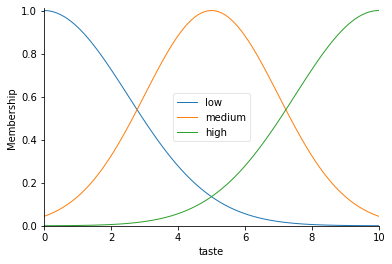

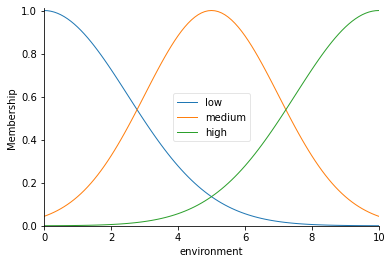

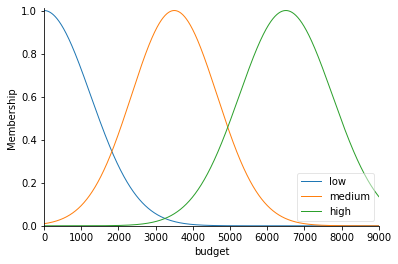

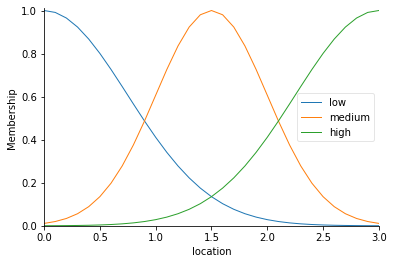

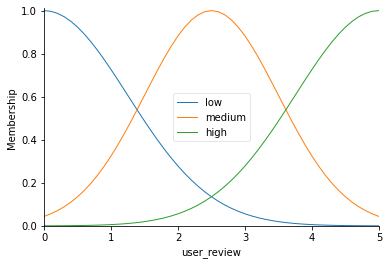

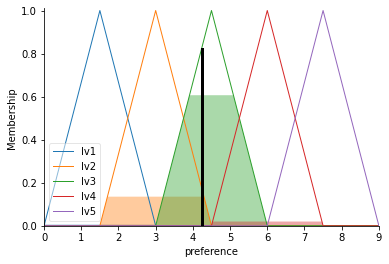

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Anteceden
taste = ctrl.Antecedent(np.arange(0,10.1,0.1), 'taste')
environment = ctrl.Antecedent(np.arange(0,10.1,0.1), 'environment')
budget = ctrl.Antecedent(np.arange(0,9001,1), 'budget')
user_review = ctrl.Antecedent(np.arange(0,5.1,0.1), 'user_review')
location = ctrl.Antecedent(np.arange(0,3.1,0.1), 'location')

preference = ctrl.Consequent(np.arange(0,9.1,0.1), 'preference')
     

taste['low']=fuzz.gaussmf(taste.universe,0,2.5)
taste['medium']=fuzz.gaussmf(taste.universe,5,2)
taste['high']=fuzz.gaussmf(taste.universe,10,2.5)
taste.view()

environment['low']=fuzz.gaussmf(environment.universe,0,2.5)
environment['medium']=fuzz.gaussmf(environment.universe,5,2)
environment['high']=fuzz.gaussmf(environment.universe,10,2.5)
environment.view()

budget['low']=fuzz.gaussmf(budget.universe,0,1250)
budget['medium']=fuzz.gaussmf(budget.universe,3500,1150)
budget['high']=fuzz.gaussmf(budget.universe,6500,1250)
budget.view()

location['low']=fuzz.gaussmf(location.universe,0,0.75)
location['medium']=fuzz.gaussmf(location.universe,1.5,0.5)
location['high']=fuzz.gaussmf(location.universe,3,0.75)
location.view()

user_review['low']=fuzz.gaussmf(user_review.universe,0,1.25)
user_review['medium']=fuzz.gaussmf(user_review.universe,2.5,1)
user_review['high']=fuzz.gaussmf(user_review.universe,5,1.25)
user_review.view()

preference['lv1'] = fuzz.trimf(preference.universe, [0,1.5,3])
preference['lv2'] = fuzz.trimf(preference.universe, [1.5,3,4.5])
preference['lv3'] = fuzz.trimf(preference.universe, [3,4.5,6])
preference['lv4'] = fuzz.trimf(preference.universe, [4.5,6,7.5])
preference['lv5'] = fuzz.trimf(preference.universe, [6,7.5,9])
#preference.view()
     

# các rule
rule = []

# have 'low'=1, 'medium'=2, 'high'=3
# 'lv1'~0-3, 'lv2'~3-6, 'lv3'~6-9, 'lv4'~9-12, 'lv5'~12-15
index = ['low', 'medium', 'high']
level = ['lv1','lv2','lv3','lv4','lv5']
lv=0
for i in index:
  for a in index:
    for b in index:
      for c in index:
        for d in index:
          rule.append(ctrl.Rule(taste[i]&environment[a]&budget[b]&location[c]&user_review[d], preference[level[lv]]))
          if (i == 'low') and (a =='low') and (b=='low') and (c=='low') and (d=='low'):
            lv = 1
          if (i == 'low') and (a =='low') and (b=='medium') and (c=='medium') and (d=='medium'):
            lv = 2
          if (i == 'high') and (a =='high') and (b=='medium') and (c=='medium') and (d=='medium'):
            lv = 3
          if (i == 'high') and (a =='high') and (b=='high') and (c=='high') and (d=='high'):
            lv = 4

preference_control = ctrl.ControlSystem(rule[:])
     
#simu
preferencing = ctrl.ControlSystemSimulation(preference_control)
preferencing.input['taste'] = 3
preferencing.input['environment'] = 5
preferencing.input['budget'] = 4000
preferencing.input['location'] = 1
preferencing.input['user_review'] = 1
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)

2.077777777777779


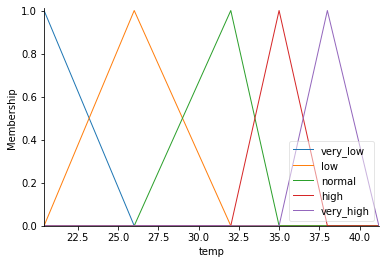

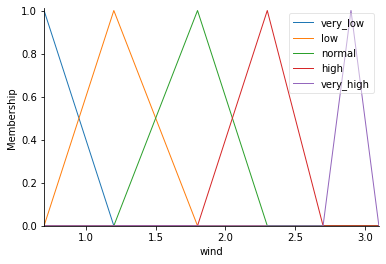

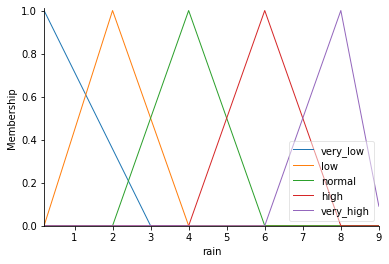

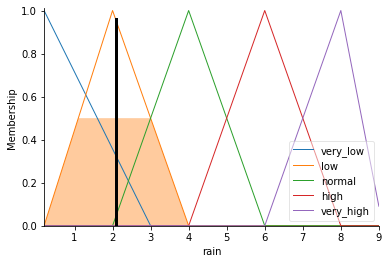

In [ ]:
# Bài 2--------------Prediction of rainfall using fuzzy logic-----------------
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
# Antecedent

temp = ctrl.Antecedent(np.arange(20.4,41.2,0.1),'temp')
wind = ctrl.Antecedent(np.arange(0.7,3.1,0.05),'wind')
rain = ctrl.Consequent(np.arange(0.2,9.1,0.1),'rain')

temp['very_low']=fuzz.trimf(temp.universe,[20.4,20.4,26])
temp['low']= fuzz.trimf(temp.universe,[20.4,26,32])
temp['normal']= fuzz.trimf(temp.universe,[26,32,35])
temp['high']= fuzz.trimf(temp.universe,[32,35,38])
temp['very_high']= fuzz.trimf(temp.universe,[35,38,41.2])
temp.view()

wind['very_low'] = fuzz.trimf(wind.universe, [0.7,0.7,1.2])
wind['low'] = fuzz.trimf(wind.universe, [0.7,1.2,1.8])
wind['normal'] = fuzz.trimf(wind.universe, [1.2,1.8,2.3])
wind['high'] = fuzz.trimf(wind.universe, [1.8,2.3,2.7])
wind['very_high'] = fuzz.trimf(wind.universe, [2.7,2.9,3.1])
wind.view()

rain['very_low'] = fuzz.trimf(rain.universe, [0.2,0.2,3])
rain['low'] = fuzz.trimf(rain.universe, [0.2,2,4])
rain['normal'] = fuzz.trimf(rain.universe, [2,4,6])
rain['high'] = fuzz.trimf(rain.universe, [4,6,8])
rain['very_high'] = fuzz.trimf(rain.universe, [6,8,9.1])
rain.view()

rule1 = ctrl.Rule(wind['very_low'] & temp['very_low'], rain['very_low'])
rule2 = ctrl.Rule(wind['very_low'] & temp['low'], rain['very_low'])
rule3 = ctrl.Rule(wind['very_low'] & temp['normal'], rain['low'])
rule4 = ctrl.Rule(wind['very_low'] & temp['high'], rain['low'])
rule5 = ctrl.Rule(wind['very_low'] & temp['very_high'], rain['low'])
rule6 = ctrl.Rule(wind['low'] & temp['very_low'], rain['low'])
rule7 = ctrl.Rule(wind['low'] & temp['low'], rain['low'])
rule8 = ctrl.Rule(wind['low'] & temp['normal'], rain['low'])
rule9 = ctrl.Rule(wind['low'] & temp['high'], rain['low'])
rule10 = ctrl.Rule(wind['low'] & temp['very_high'], rain['normal'])
rule11 = ctrl.Rule(wind['normal'] & temp['very_low'], rain['low'])
rule12 = ctrl.Rule(wind['normal'] & temp['low'], rain['low'])
rule13 = ctrl.Rule(wind['normal'] & temp['normal'], rain['normal'])
rule14 = ctrl.Rule(wind['normal'] & temp['high'], rain['normal'])
rule15 = ctrl.Rule(wind['normal'] & temp['very_high'], rain['normal'])
rule16 = ctrl.Rule(wind['high'] & temp['very_low'], rain['low'])
rule17 = ctrl.Rule(wind['high'] & temp['low'], rain['low'])
rule18 = ctrl.Rule(wind['high'] & temp['normal'], rain['normal'])
rule19 = ctrl.Rule(wind['high'] & temp['high'], rain['normal'])
rule20 = ctrl.Rule(wind['high'] & temp['very_high'], rain['high'])
rule21 = ctrl.Rule(wind['very_high'] & temp['very_low'], rain['low'])
rule22 = ctrl.Rule(wind['very_high'] & temp['low'], rain['normal'])
rule23 = ctrl.Rule(wind['very_high'] & temp['normal'], rain['normal'])
rule24 = ctrl.Rule(wind['very_high'] & temp['high'], rain['high'])
rule25 = ctrl.Rule(wind['very_high'] & temp['very_high'], rain['very_high'])

rain_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
     

#Simun
raining = ctrl.ControlSystemSimulation(rain_ctrl)
raining.input['wind'] = 1.5
raining.input['temp'] = 24.4
raining.compute()
print(raining.output['rain'])
rain.view(sim=raining)

45.0


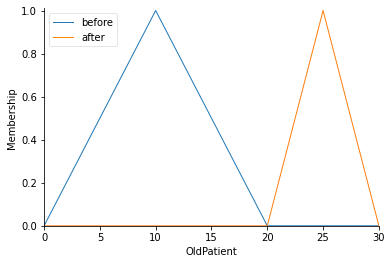

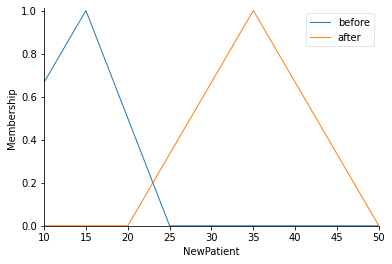

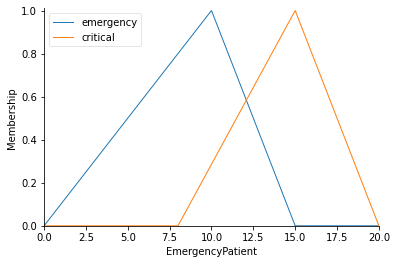

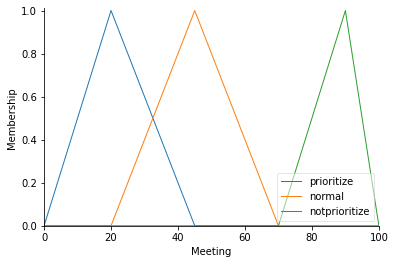

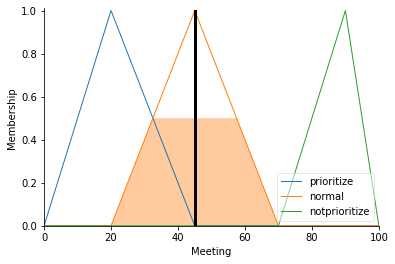

In [ ]:
#-----------Patients Management System using Fuzzy Logic: An easier and dynamic appointment system----------------

#Antecendent
OldPatient = ctrl.Antecedent(np.arange(0,31,1),'OldPatient')
NewPatient = ctrl.Antecedent(np.arange(10,51,1),'NewPatient')
EmergencyPatient = ctrl.Antecedent(np.arange(0,21,1),'EmergencyPatient')
Meeting = ctrl.Consequent(np.arange(0,101,1),'Meeting')


OldPatient['before']=fuzz.trimf(OldPatient.universe,[0,10,20])
OldPatient['after']=fuzz.trimf(OldPatient.universe,[20,25,30])
OldPatient.view()

NewPatient['before']=fuzz.trimf(NewPatient.universe,[0,15,25])
NewPatient['after']=fuzz.trimf(NewPatient.universe,[20,35,50])
NewPatient.view()

EmergencyPatient['emergency']=fuzz.trimf(EmergencyPatient.universe,[0,10,15])
EmergencyPatient['critical']=fuzz.trimf(EmergencyPatient.universe,[8,15,20])
EmergencyPatient.view()

Meeting['prioritize']=fuzz.trimf(Meeting.universe,[0,20,45])
Meeting['normal']=fuzz.trimf(Meeting.universe,[20,45,70])
Meeting['notprioritize']=fuzz.trimf(Meeting.universe,[70,90,100])
Meeting.view()


#rule
rule1=ctrl.Rule(OldPatient['before'] & NewPatient['before'] & EmergencyPatient['emergency'], Meeting['notprioritize'])
rule2=ctrl.Rule(OldPatient['before'] & NewPatient['after'] & EmergencyPatient['emergency'], Meeting['notprioritize'])
rule3=ctrl.Rule(OldPatient['after'] & NewPatient['before'] & EmergencyPatient['emergency'], Meeting['normal'])
rule4=ctrl.Rule(OldPatient['after'] & NewPatient['after'] & EmergencyPatient['emergency'], Meeting['prioritize'])

rule5=ctrl.Rule(OldPatient['before'] & NewPatient['before'] & EmergencyPatient['critical'], Meeting['normal'])
rule6=ctrl.Rule(OldPatient['before'] & NewPatient['after'] & EmergencyPatient['critical'], Meeting['prioritize'])
rule7=ctrl.Rule(OldPatient['after'] & NewPatient['before'] & EmergencyPatient['critical'], Meeting['prioritize'])
rule8=ctrl.Rule(OldPatient['after'] & NewPatient['after'] & EmergencyPatient['critical'], Meeting['prioritize'])


meeting_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
meetingsimu = ctrl.ControlSystemSimulation(meeting_ctrl)
meetingsimu.input['OldPatient']=10
meetingsimu.input['NewPatient'] = 20
meetingsimu.input['EmergencyPatient'] = 15
meetingsimu.compute()
print(meetingsimu.output['Meeting'])
Meeting.view(sim=meetingsimu)

0.4772757024265646


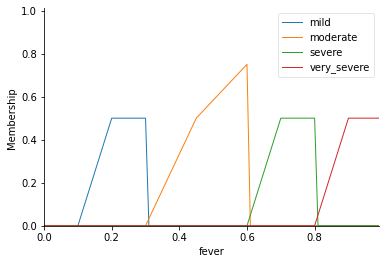

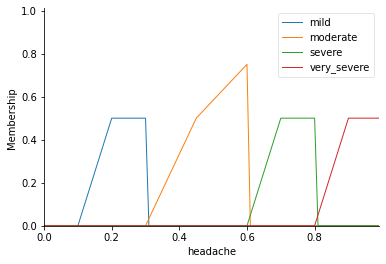

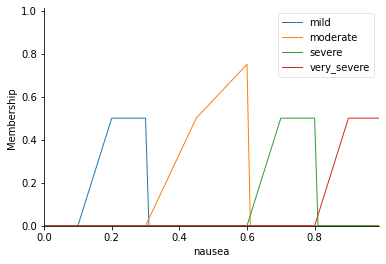

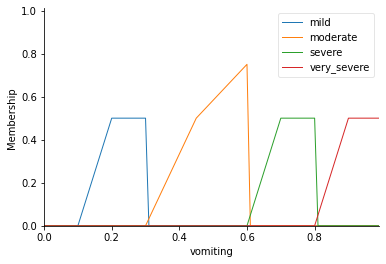

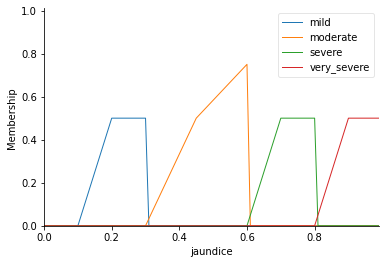

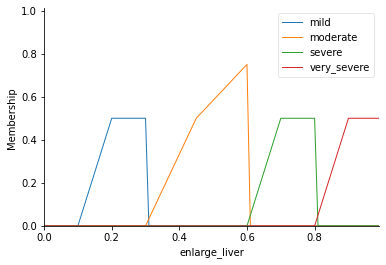

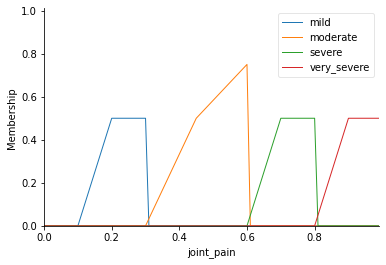

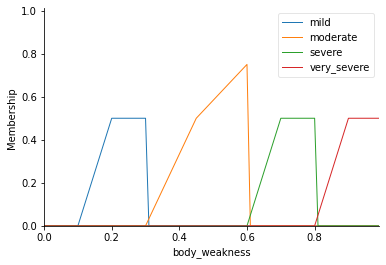

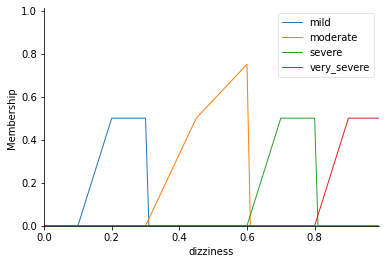

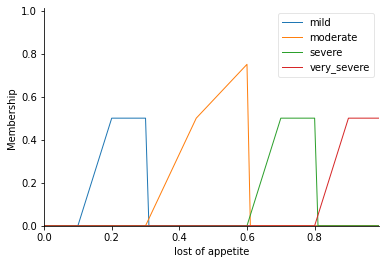

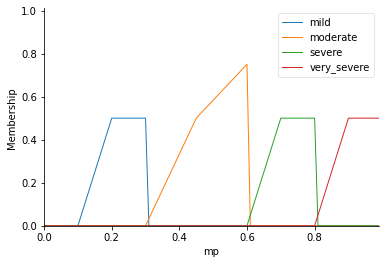

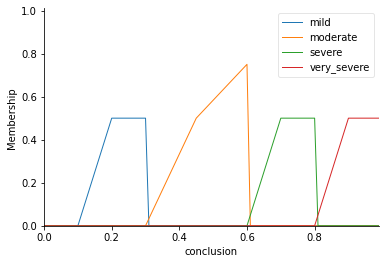

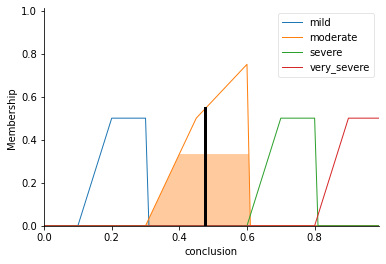

In [8]:
#-----------------Medical Diagnosis System Using Fuzzy Logic---------------


#Antecedent
fever=ctrl.Antecedent(np.arange(0,1,0.01),'fever')
headache=ctrl.Antecedent(np.arange(0,1,0.01),'headache')
nausea=ctrl.Antecedent(np.arange(0,1,0.01),'nausea')
vomiting=ctrl.Antecedent(np.arange(0,1,0.01),'vomiting')
jaundice=ctrl.Antecedent(np.arange(0,1,0.01),'jaundice')
enlarge_liver=ctrl.Antecedent(np.arange(0,1,0.01),'enlarge_liver')
joint_pain=ctrl.Antecedent(np.arange(0,1,0.01),'joint_pain')
body_weakness=ctrl.Antecedent(np.arange(0,1,0.01),'body_weakness')
dizziness=ctrl.Antecedent(np.arange(0,1,0.01),'dizziness')
lofappetite=ctrl.Antecedent(np.arange(0,1,0.01),'lost of appetite')
mp=ctrl.Antecedent(np.arange(0,1,0.01),'mp')
conclusion=ctrl.Consequent(np.arange(0,1,0.01),'conclusion')

#
fever['mild']=fuzz.trapmf(fever.universe,[0.1,0.2,0.3,0.3])*0.5
fever['moderate']=fuzz.trapmf(fever.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(fever.universe,[0.45,0.6,0.6])*0.25
fever['severe']=fuzz.trapmf(fever.universe,[0.6,0.7,0.8,0.8])*0.5
fever['very_severe']=fuzz.trapmf(fever.universe,[0.8,0.9,1,1])*0.5
fever.view()


headache['mild']=fuzz.trapmf(headache.universe,[0.1,0.2,0.3,0.3])*0.5
headache['moderate']=fuzz.trapmf(headache.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(headache.universe,[0.45,0.6,0.6])*0.25
headache['severe']=fuzz.trapmf(headache.universe,[0.6,0.7,0.8,0.8])*0.5
headache['very_severe']=fuzz.trapmf(headache.universe,[0.8,0.9,1,1])*0.5
headache.view()

nausea['mild']=fuzz.trapmf(nausea.universe,[0.1,0.2,0.3,0.3])*0.5
nausea['moderate']=fuzz.trapmf(nausea.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(nausea.universe,[0.45,0.6,0.6])*0.25
nausea['severe']=fuzz.trapmf(nausea.universe,[0.6,0.7,0.8,0.8])*0.5
nausea['very_severe']=fuzz.trapmf(nausea.universe,[0.8,0.9,1,1])*0.5
nausea.view()

vomiting['mild']=fuzz.trapmf(vomiting.universe,[0.1,0.2,0.3,0.3])*0.5
vomiting['moderate']=fuzz.trapmf(vomiting.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(vomiting.universe,[0.45,0.6,0.6])*0.25
vomiting['severe']=fuzz.trapmf(vomiting.universe,[0.6,0.7,0.8,0.8])*0.5
vomiting['very_severe']=fuzz.trapmf(vomiting.universe,[0.8,0.9,1,1])*0.5
vomiting.view()

jaundice['mild']=fuzz.trapmf(jaundice.universe,[0.1,0.2,0.3,0.3])*0.5
jaundice['moderate']=fuzz.trapmf(jaundice.universe,[0.3,0.45,0.6,0.6])*0.5+ fuzz.trimf(jaundice.universe,[0.45,0.6,0.6])*0.25
jaundice['severe']=fuzz.trapmf(jaundice.universe,[0.6,0.7,0.8,0.8])*0.5
jaundice['very_severe']=fuzz.trapmf(jaundice.universe,[0.8,0.9,1,1])*0.5
jaundice.view()

enlarge_liver['mild']=fuzz.trapmf(enlarge_liver.universe,[0.1,0.2,0.3,0.3])*0.5
enlarge_liver['moderate']=fuzz.trapmf(enlarge_liver.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(enlarge_liver.universe,[0.45,0.6,0.6])*0.25
enlarge_liver['severe']=fuzz.trapmf(enlarge_liver.universe,[0.6,0.7,0.8,0.8])*0.5
enlarge_liver['very_severe']=fuzz.trapmf(enlarge_liver.universe,[0.8,0.9,1,1])*0.5
enlarge_liver.view()

joint_pain['mild']=fuzz.trapmf(joint_pain.universe,[0.1,0.2,0.3,0.3])*0.5
joint_pain['moderate']=fuzz.trapmf(joint_pain.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(joint_pain.universe,[0.45,0.6,0.6])*0.25
joint_pain['severe']=fuzz.trapmf(joint_pain.universe,[0.6,0.7,0.8,0.8])*0.5
joint_pain['very_severe']=fuzz.trapmf(joint_pain.universe,[0.8,0.9,1,1])*0.5
joint_pain.view()

body_weakness['mild']=fuzz.trapmf(body_weakness.universe,[0.1,0.2,0.3,0.3])*0.5
body_weakness['moderate']=fuzz.trapmf(body_weakness.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(body_weakness.universe,[0.45,0.6,0.6])*0.25
body_weakness['severe']=fuzz.trapmf(body_weakness.universe,[0.6,0.7,0.8,0.8])*0.5
body_weakness['very_severe']=fuzz.trapmf(body_weakness.universe,[0.8,0.9,1,1])*0.5
body_weakness.view()

dizziness['mild']=fuzz.trapmf(dizziness.universe,[0.1,0.2,0.3,0.3])*0.5
dizziness['moderate']=fuzz.trapmf(dizziness.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(dizziness.universe,[0.45,0.6,0.6])*0.25
dizziness['severe']=fuzz.trapmf(dizziness.universe,[0.6,0.7,0.8,0.8])*0.5
dizziness['very_severe']=fuzz.trapmf(dizziness.universe,[0.8,0.9,1,1])*0.5
dizziness.view()

lofappetite['mild']=fuzz.trapmf(lofappetite.universe,[0.1,0.2,0.3,0.3])*0.5
lofappetite['moderate']=fuzz.trapmf(lofappetite.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(lofappetite.universe,[0.45,0.6,0.6])*0.25
lofappetite['severe']=fuzz.trapmf(lofappetite.universe,[0.6,0.7,0.8,0.8])*0.5
lofappetite['very_severe']=fuzz.trapmf(lofappetite.universe,[0.8,0.9,1,1])*0.5
lofappetite.view()

mp['mild']=fuzz.trapmf(mp.universe,[0.1,0.2,0.3,0.3])*0.5
mp['moderate']=fuzz.trapmf(mp.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(mp.universe,[0.45,0.6,0.6])*0.25
mp['severe']=fuzz.trapmf(mp.universe,[0.6,0.7,0.8,0.8])*0.5
mp['very_severe']=fuzz.trapmf(mp.universe,[0.8,0.9,1,1])*0.5
mp.view()

conclusion['mild']=fuzz.trapmf(conclusion.universe,[0.1,0.2,0.3,0.3])*0.5
conclusion['moderate']=fuzz.trapmf(conclusion.universe,[0.3,0.45,0.6,0.6])*0.5+fuzz.trimf(conclusion.universe,[0.45,0.6,0.6])*0.25
conclusion['severe']=fuzz.trapmf(conclusion.universe,[0.6,0.7,0.8,0.8])*0.5
conclusion['very_severe']=fuzz.trapmf(conclusion.universe,[0.8,0.9,1,1])*0.5
conclusion.view()


# rule 
rule_1=ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']&dizziness['severe']&lofappetite['mild']&mp['mild'],conclusion['mild'])
rule_2=ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizziness['severe']&lofappetite['severe']&mp['moderate'],conclusion['moderate'])
rule_3=ctrl.Rule(fever['severe']&headache['moderate']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']&dizziness['severe']&lofappetite['severe']&mp['moderate'],conclusion['severe'])
rule_4=ctrl.Rule(fever['very_severe']&headache['mild']&nausea['mild']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['severe']&body_weakness['severe']&dizziness['mild']&lofappetite['mild']&mp['severe'],conclusion['very_severe'])
rule_5=ctrl.Rule(fever['moderate']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&lofappetite['severe']&mp['moderate'],conclusion['moderate'])
rule_6=ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['mild']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['mild']&dizziness['moderate']&lofappetite['mild']&mp['mild'],conclusion['mild'])
rule_7=ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['severe']&body_weakness['severe']&dizziness['moderate']&lofappetite['moderate']&mp['moderate'],conclusion['severe'])
rule_8=ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['moderate']&enlarge_liver['moderate']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&lofappetite['moderate']&mp['moderate'],conclusion['moderate'])
rule_9=ctrl.Rule(fever['moderate']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['moderate']&dizziness['severe']&lofappetite['moderate']&mp['moderate'],conclusion['moderate'])
rule_10=ctrl.Rule(fever['mild']&headache['mild']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['mild']&dizziness['mild']&lofappetite['mild']&mp['mild'],conclusion['mild'])
rule_11=ctrl.Rule(fever['severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['very_severe']&dizziness['severe']&lofappetite['severe']&mp['moderate'],conclusion['very_severe'])
rule_12=ctrl.Rule(fever['moderate']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['moderate']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']&dizziness['moderate']&lofappetite['mild']&mp['moderate'],conclusion['severe'])
rule_13=ctrl.Rule(fever['mild']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['moderate']&dizziness['mild']&lofappetite['moderate']&mp['moderate'],conclusion['moderate'])
rule_14=ctrl.Rule(fever['severe']&headache['severe']&nausea['moderate']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['severe']&dizziness['moderate']&lofappetite['moderate']&mp['severe'],conclusion['severe'])
rule_15=ctrl.Rule(fever['mild']&headache['mild']&nausea['mild']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['mild']&body_weakness['severe']&dizziness['mild']&lofappetite['severe']&mp['moderate'],conclusion['severe'])
rule_16=ctrl.Rule(fever['very_severe']&headache['moderate']&nausea['mild']&vomiting['moderate']&jaundice['severe']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['very_severe']&dizziness['severe']&lofappetite['mild']&mp['moderate'],conclusion['very_severe'])
rule_17=ctrl.Rule(fever['mild']&headache['very_severe']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['moderate']&joint_pain['mild']&body_weakness['moderate']&dizziness['very_severe']&lofappetite['mild']&mp['moderate'],conclusion['very_severe'])
rule_18=ctrl.Rule(fever['moderate']&headache['very_severe']&nausea['very_severe']&vomiting['mild']&jaundice['severe']&enlarge_liver['severe']&joint_pain['moderate']&body_weakness['severe']&dizziness['very_severe']&lofappetite['very_severe']&mp['severe'],conclusion['very_severe'])
rule_19=ctrl.Rule(fever['moderate']&headache['moderate']&nausea['moderate']&vomiting['moderate']&jaundice['mild']&enlarge_liver['mild']&joint_pain['moderate']&body_weakness['moderate']&dizziness['moderate']&lofappetite['moderate']&mp['moderate'],conclusion['moderate'])
rule_20=ctrl.Rule(fever['very_severe']&headache['severe']&nausea['severe']&vomiting['severe']&jaundice['severe']&enlarge_liver['severe']&joint_pain['severe']&body_weakness['very_severe']&dizziness['severe']&lofappetite['severe']&mp['moderate'],conclusion['very_severe'])

gess_ctrl=ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,rule_19,rule_20])
gessing=ctrl.ControlSystemSimulation(gess_ctrl)
gessing.input['fever']=0.4
gessing.input['headache']=0.6
gessing.input['nausea']=0.4
gessing.input['vomiting']=0.4
gessing.input['jaundice']=0.5
gessing.input['enlarge_liver']=0.4
gessing.input['joint_pain']=0.5
gessing.input['body_weakness']=0.5
gessing.input['dizziness']=0.4
gessing.input['lost of appetite']=0.5
gessing.input['mp']=0.5
gessing.compute()
print(gessing.output['conclusion'])
conclusion.view(sim=gessing)

9.451851851851854


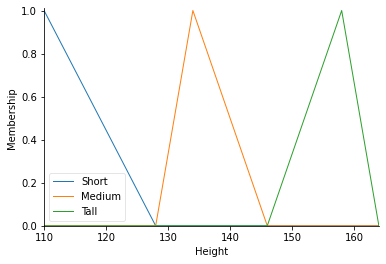

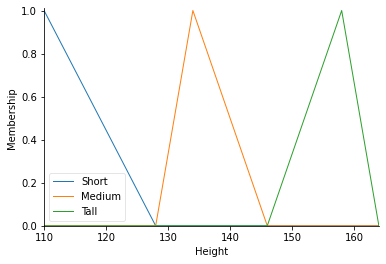

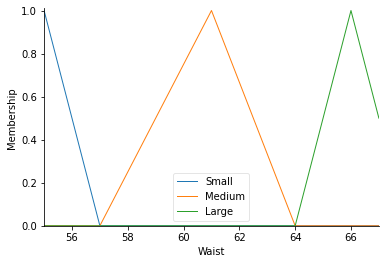

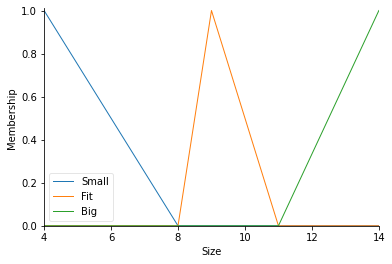

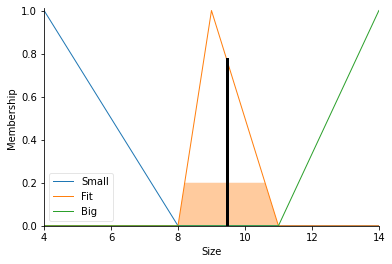

In [9]:
#---------------Intelligent Size Matching Recommender System: Fuzzy Logic Approach in Children Clothing Selection----------------


#Antecedent
Height = ctrl.Antecedent(np.arange(110, 165, 1), 'Height')
Chest = ctrl.Antecedent(np.arange(58, 83, 1), 'Chest')
Waist = ctrl.Antecedent(np.arange(55, 68, 1), 'Waist')
Size = ctrl.Consequent(np.arange(4, 15 , 1), 'Size')


Height['Short'] = fuzz.trimf(Height.universe, [110, 110, 128])
Height['Medium'] = fuzz.trimf(Height.universe, [128, 134, 146])
Height['Tall'] = fuzz.trimf(Height.universe, [146, 158,164])
Height.view()


Chest['Small'] = fuzz.trimf(Chest.universe, [58, 58, 65])
Chest['Medium'] = fuzz.trimf(Chest.universe, [65, 70, 75])
Chest['Large'] = fuzz.trimf(Chest.universe, [75, 79, 83])
Height.view()


Waist['Small'] = fuzz.trimf(Waist.universe, [55, 55, 57])
Waist['Medium'] = fuzz.trimf(Waist.universe, [57, 61, 64])
Waist['Large'] = fuzz.trimf(Waist.universe, [64, 66, 68])
Waist.view()

Size['Small'] = fuzz.trimf(Size.universe, [4, 4, 8])
Size['Fit'] = fuzz.trimf(Size.universe, [8, 9, 11])
Size['Big'] = fuzz.trimf(Size.universe, [11, 14, 14])
Size.view()


#rule
rule1 = ctrl.Rule(Height['Short'] & Chest['Small'] & Waist['Small'], Size['Small'])
rule2 = ctrl.Rule(Height['Short'] & Chest['Small'] & Waist['Medium'], Size['Small'])
rule3 = ctrl.Rule(Height['Short'] & Chest['Medium'] & Waist['Small'], Size['Small'])
rule4 = ctrl.Rule(Height['Short'] & Chest['Medium'] & Waist['Medium'], Size['Small'])
rule5 = ctrl.Rule(Height['Short'] & Chest['Medium'] & Waist['Large'], Size['Fit'])
rule6 = ctrl.Rule(Height['Short'] & Chest['Large'] & Waist['Small'], Size['Fit'])
rule7 = ctrl.Rule(Height['Short'] & Chest['Large'] & Waist['Medium'], Size['Fit'])
rule8 = ctrl.Rule(Height['Short'] & Chest['Small'] & Waist['Large'], Size['Fit'])
rule9 = ctrl.Rule(Height['Short'] & Chest['Large'] & Waist['Large'], Size['Fit'])
rule10 = ctrl.Rule(Height['Medium'] & Chest['Small'] & Waist['Small'], Size['Small'])
rule11 = ctrl.Rule(Height['Medium'] & Chest['Small'] & Waist['Medium'], Size['Fit'])
rule12 = ctrl.Rule(Height['Medium'] & Chest['Small'] & Waist['Large'], Size['Fit'])
rule13 = ctrl.Rule(Height['Medium'] & Chest['Medium'] & Waist['Small'], Size['Fit'])
rule14 = ctrl.Rule(Height['Medium'] & Chest['Medium'] & Waist['Medium'], Size['Fit'])
rule15 = ctrl.Rule(Height['Medium'] & Chest['Medium'] & Waist['Large'], Size['Big'])
rule16 = ctrl.Rule(Height['Medium'] & Chest['Large'] & Waist['Small'], Size['Fit'])
rule17 = ctrl.Rule(Height['Medium'] & Chest['Large'] & Waist['Medium'], Size['Big'])
rule18 = ctrl.Rule(Height['Medium'] & Chest['Large'] & Waist['Large'], Size['Big'])
rule19 = ctrl.Rule(Height['Tall'] & Chest['Small'] & Waist['Small'], Size['Small'])
rule20 = ctrl.Rule(Height['Tall'] & Chest['Small'] & Waist['Medium'], Size['Small'])
rule21 = ctrl.Rule(Height['Tall'] & Chest['Small'] & Waist['Large'], Size['Fit'])
rule22 = ctrl.Rule(Height['Tall'] & Chest['Medium'] & Waist['Small'], Size['Fit'])
rule23 = ctrl.Rule(Height['Tall'] & Chest['Medium'] & Waist['Medium'], Size['Fit'])
rule24 = ctrl.Rule(Height['Tall'] & Chest['Medium'] & Waist['Large'], Size['Big'])
rule25 = ctrl.Rule(Height['Tall'] & Chest['Large'] & Waist['Small'], Size['Fit'])
rule26 = ctrl.Rule(Height['Tall'] & Chest['Large'] & Waist['Medium'], Size['Big'])
rule27 = ctrl.Rule(Height['Tall'] & Chest['Large'] & Waist['Large'], Size['Big'])


Sizing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
Sizing= ctrl.ControlSystemSimulation(Sizing_ctrl)
Sizing.input['Height'] = 140
Sizing.input['Chest'] = 66
Sizing.input['Waist'] = 59

Sizing.compute()
print(Sizing.output['Size'])
Size.view(sim=Sizing)